In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
df = pd.read_csv(r'C:\Users\lilie\OneDrive\Bureau\ironHack\dataset\fake_real_final.csv')

In [5]:
df

,title,text,label_REAL,subject,date
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,NaN,NaN
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,NaN,NaN
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,NaN,NaN
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,NaN,NaN
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,NaN,NaN
...,...,...,...,...,...
50990,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,worldnews,08-22-2017-
50991,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1,worldnews,08-22-2017-
50992,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1,worldnews,08-22-2017-
50993,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1,worldnews,08-22-2017-


In [8]:
df.label_REAL.value_counts(normalize=True)

0    0.522208
1    0.477792
Name: label_REAL, dtype: float64

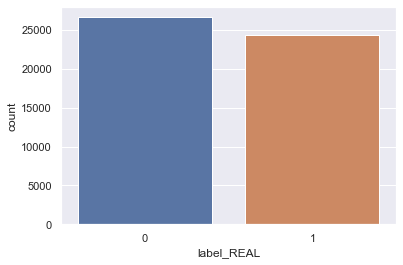

In [11]:
sns.countplot(df.label_REAL)

In [6]:
df['txt'] = df['title'] + " " + df['text']
df = df.drop(columns = ['title', 'text','subject','date'])
df = df.loc[~df['txt'].isna()]
df.head()

,label_REAL,txt
0,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy U....
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...


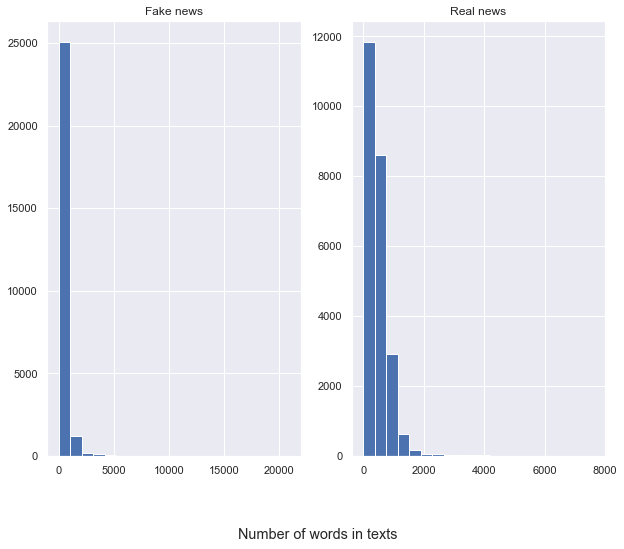

In [250]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))

text_len = df[df.label_REAL==0]['txt'].str.split().map(lambda x: len(x))
ax1.hist(text_len, bins = 20)
ax1.set_title('Fake news')

text_len = df[df.label_REAL==1]['txt'].str.split().map(lambda x: len(x))
ax2.hist(text_len, bins = 20)
ax2.set_title('Real news')

fig.suptitle('Number of words in texts', y=0)
fig.show()

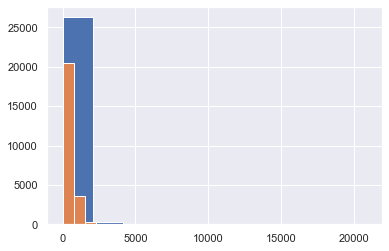

In [253]:
df[df.label_REAL==0]['txt'].str.split().map(lambda x: len(x)).hist() #blue
df[df.label_REAL==1]['txt'].str.split().map(lambda x: len(x)).hist() #orange

# Split train-test

In [7]:
X = df.txt
y = df.label_REAL
X.head()

0    You Can Smell Hillary’s Fear Daniel Greenfield...
1    Watch The Exact Moment Paul Ryan Committed Pol...
2    Kerry to go to Paris in gesture of sympathy U....
3    Bernie supporters on Twitter erupt in anger ag...
4    The Battle of New York: Why This Primary Matte...
Name: txt, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Preprocessing - 1st approach (tfidf)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
### tf-idf
tfidf_vectorizer = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)

X_tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test = tfidf_vectorizer.transform(X_test)

NameError: name 'X_train' is not defined

# Preprocessing - 2nd approach (tfidf n-grams=1,3)

In [8]:
### tf-idf with n-grams
tfidf_vectorizer2 = TfidfVectorizer(ngram_range=(1, 3),stop_words='english', max_df=0.7)

X_tfidf_train2 = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test2 = tfidf_vectorizer.transform(X_test)

# Modelling

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

## passiveAggressive 

In [53]:
from sklearn.linear_model import PassiveAggressiveClassifier

### 1. tf-idf

In [19]:
clf = PassiveAggressiveClassifier(n_iter_no_change=100)
clf.fit(X_tfidf_train, y_train)
y_pred = clf.predict(X_tfidf_test)

cm = confusion_matrix(y_test, y_pred)
display(cm)
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

array([[7823,  165],
       [ 172, 7139]], dtype=int64)

Accuracy is 0.978
Precision is 0.9774
Recall is 0.9765
F1 is 0.9769


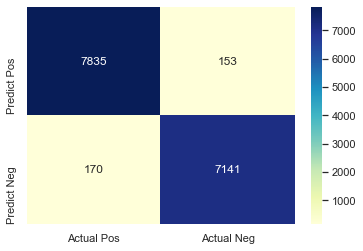

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 2. tf-idf n-grams 

In [259]:
clf = PassiveAggressiveClassifier(n_iter_no_change=50)
clf.fit(X_tfidf_train2, y_train)
y_pred2 = clf.predict(X_tfidf_test2)

display(cm)
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

array([[7337,  651],
       [ 792, 6519]], dtype=int64)

Accuracy is 0.9722
Precision is 0.9755
Recall is 0.9659
F1 is 0.9707


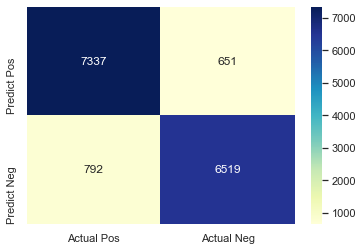

In [164]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

### 1. tf-idf

In [260]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_tfidf_train, y_train)
y_pred=dtc.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.951
Precision is 0.9573
Recall is 0.9393
F1 is 0.9482


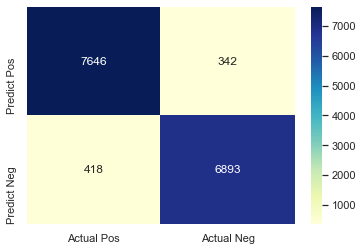

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 2. tf-idf n-grams

In [261]:
dtc.fit(X_tfidf_train2, y_train)
y_pred2=dtc.predict(X_tfidf_test2)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.951
Precision is 0.9573
Recall is 0.9393
F1 is 0.9482


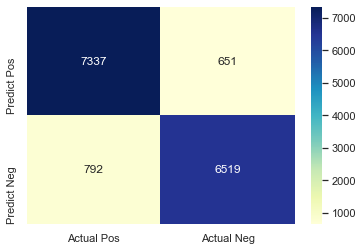

In [167]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB

### 1. tf-idf

In [262]:
classifier=MultinomialNB()
classifier.fit(X_tfidf_train, y_train)
y_pred = classifier.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9057
Precision is 0.9092
Recall is 0.8917
F1 is 0.9004


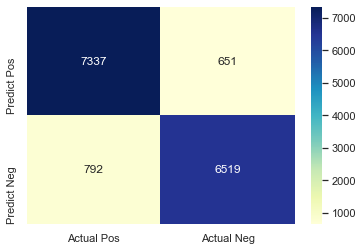

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 2. tf-idf n-grams

In [263]:
classifier=MultinomialNB()
classifier.fit(X_tfidf_train2, y_train)
y_pred2 = classifier.predict(X_tfidf_test2)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9057
Precision is 0.9092
Recall is 0.8917
F1 is 0.9004


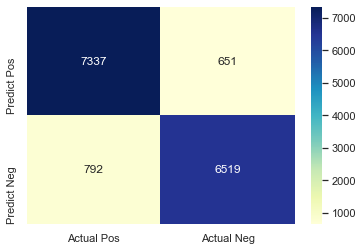

In [169]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier()
rf.fit(X_tfidf_train,y_train)
y_pred = rf.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9645
Precision is 0.9717
Recall is 0.9535
F1 is 0.9625


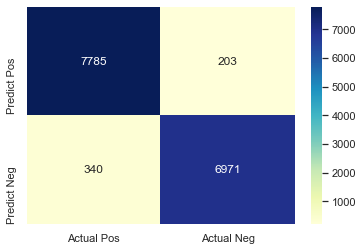

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# SVM (too long)

In [21]:
from sklearn.svm import SVC

In [ ]:
SVM = SVC(kernel = 'linear')
SVMClassifier = SVM.fit(X_tfidf_train, y_train)
y_pred = SVMClassifier.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

# SGD Classifier

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
SGD = SGDClassifier(loss = 'modified_huber')
SGDC = SGD.fit(X_tfidf_train, y_train)
y_pred = SGDC.predict(X_tfidf_test)

In [25]:
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9759
Precision is 0.9763
Recall is 0.9733
F1 is 0.9748


## TFIDF and PassiveAggressive classifier features selection

In [22]:
tfidf_vectorizer = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test = tfidf_vectorizer.transform(X_test)

clf = PassiveAggressiveClassifier(n_iter_no_change=100)
clf.fit(X_tfidf_train, y_train)
y_pred = clf.predict(X_tfidf_test)

display(confusion_matrix(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred).round(4))

array([[7830,  158],
       [ 166, 7145]], dtype=int64)

Precision is 0.9784


In [30]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english')
X_tfidf_train2 = tfidf_vectorizer2.fit_transform(X_train) 
X_tfidf_test2 = tfidf_vectorizer2.transform(X_test)

clf.fit(X_tfidf_train2, y_train)
y_pred2 = clf.predict(X_tfidf_test2)

display(confusion_matrix(y_test, y_pred2))
print('Precision is', precision_score(y_test, y_pred2).round(4))

array([[7805,  183],
       [ 228, 7083]], dtype=int64)

Precision is 0.9748


In [31]:
tfidf_vectorizer3 = TfidfVectorizer(strip_accents=ascii, stop_words='english')
X_tfidf_train3 = tfidf_vectorizer3.fit_transform(X_train) 
X_tfidf_test3 = tfidf_vectorizer3.transform(X_test)

clf.fit(X_tfidf_train3, y_train)
y_pred3 = clf.predict(X_tfidf_test3)

display(confusion_matrix(y_test, y_pred3))
print('Precision is', precision_score(y_test, y_pred3).round(4))

array([[7831,  157],
       [ 168, 7143]], dtype=int64)

Precision is 0.9785


In [33]:
tfidf_vectorizer5 = TfidfVectorizer(strip_accents=ascii, stop_words='english', min_df=0.1, max_df=0.9)
X_tfidf_train5 = tfidf_vectorizer5.fit_transform(X_train) 
X_tfidf_test5 = tfidf_vectorizer5.transform(X_test)

clf.fit(X_tfidf_train5, y_train)
y_pred5 = clf.predict(X_tfidf_test5)

display(confusion_matrix(y_test, y_pred5))
print('Precision is', precision_score(y_test, y_pred5).round(4))

array([[7446,  542],
       [ 390, 6921]], dtype=int64)

Precision is 0.9274


### Best prediction

In [54]:
tfidf_vectorizer4 = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.9)
X_tfidf_train4 = tfidf_vectorizer4.fit_transform(X_train) 
X_tfidf_test4 = tfidf_vectorizer4.transform(X_test)

clf.fit(X_tfidf_train4, y_train)
y_pred4 = clf.predict(X_tfidf_test4)

display(confusion_matrix(y_test, y_pred4))
print('Accuracy is', accuracy_score(y_test, y_pred4).round(4))
print('Precision is', precision_score(y_test, y_pred4).round(4))
print('Recall is', recall_score(y_test, y_pred4).round(4))
print('F1 is', f1_score(y_test, y_pred4).round(4))

array([[7842,  146],
       [ 175, 7136]], dtype=int64)

Accuracy is 0.979
Precision is 0.98
Recall is 0.9761
F1 is 0.978


In [55]:
tfidf_items = tfidf_vectorizer4.vocabulary_.items()
list(tfidf_items)[:15]

[('dallas', 30220),
 ('maidan', 66949),
 ('staged', 107263),
 ('snipers', 105469),
 ('designed', 32471),
 ('inflict', 54805),
 ('u2018strategy', 119086),
 ('tension', 111794),
 ('u2019', 119433),
 ('daily', 30160),
 ('shooter', 103505),
 ('21st', 3825),
 ('century', 23293),
 ('wirelast', 135302),
 ('night', 78116)]

# Tf-idf for Real and Fake news

In [10]:
df_real = df.loc[df.label_REAL==1]
df_fake = df.loc[df.label_REAL==0]
df_real.shape

(24365, 2)

In [130]:
dic = tfidf_real.vocabulary_
dic = sorted(dic.items(), key=lambda x:x[1], reverse=False)
sortdict = dict(dic)
print(sortdict)

In [32]:
tfidf_fake = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)
X_tfidf_fake_train = tfidf_fake.fit_transform(X_train) 
X_tfidf_fake_test = tfidf_fake.transform(X_test)

In [147]:
#top 30 fake news
topn_class1=sorted(zip(clf.coef_[0], tfidf_vectorizer4.get_feature_names()))[:10]
for coef, feat in topn_class1:
        print(clf.classes_[1], coef, feat)

[(-8.758666841968838, 'featured'),
 (-8.582790942878637, 'image'),
 (-8.23763629974966, 'breaking'),
 (-7.209746417521291, 'video'),
 (-7.1929940812639, 'read'),
 (-7.081565221704481, 'nwearing'),
 (-5.956205996383033, 'getty'),
 (-5.745642103493524, 'watch'),
 (-5.449278070570245, 'hillary'),
 (-5.377934252232653, 'ipsos')]

In [151]:
#top 30 real news
topn_class2=sorted(zip(clf.coef_[0], tfidf_vectorizer4.get_feature_names()))[-10:]
for coef, feat in topn_class2:
        print(clf.classes_[0], coef, feat)

0 3.840119954733524 washington
0 3.876693725188236 monday
0 4.0698036605270556 tuesday
0 4.320603222169065 factbox
0 4.498842022114984 xa0the
0 4.777451158816453 thursday
0 6.879067088642821 nbut
0 7.152852727363315 xa0
0 7.408257834416797 said
0 25.507878117854734 reuters


In [146]:
#top 20 vectors for fake and real news
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)
        
most_informative_feature_for_binary_classification(tfidf_vectorizer4, clf, n=30)

0 -8.758666841968838 featured
0 -8.582790942878637 image
0 -8.23763629974966 breaking
0 -7.209746417521291 video
0 -7.1929940812639 read
0 -7.081565221704481 nwearing
0 -5.956205996383033 getty
0 -5.745642103493524 watch
0 -5.449278070570245 hillary
0 -5.377934252232653 ipsos
0 -5.30180119751959 nothers
0 -4.870707139664385 u201c
0 -4.6725622894696 com
0 -4.643606017056696 neven
0 -4.471121128948189 october
0 -4.284619452185391 just
0 -4.253637420942676 breitbart
0 -4.160897057460708 pic
0 -4.11141018392776 u2026
0 -4.036556884570469 entire
0 -4.003923143602376 flickr
0 -3.8882005088203417 photo
0 -3.851508061597044 mr
0 -3.839295794195911 wfb
0 -3.802374496667736 2016
0 -3.7472316154173453 nation
0 -3.731594936349467 https
0 -3.707608382136202 statesofthenation
0 -3.5979787987244403 ap
0 -3.5927061530925117 images

1 25.507878117854734 reuters
1 7.408257834416797 said
1 7.152852727363315 xa0
1 6.879067088642821 nbut
1 4.777451158816453 thursday
1 4.498842022114984 xa0the
1 4.320603222

# Predictions on scraped data

In [104]:
df_infowars = pd.read_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Fake_News\data\df_infowars.csv')
df_reuters = pd.read_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Fake_News\data\df_reuters.csv')

In [105]:
print(df_infowars.shape)
print(df_reuters.shape)

(89, 3)
(82, 2)


In [106]:
df_infowars['txt'] = df_infowars['title'] + " " + df_infowars['text']
df_infowars = df_infowars.drop(columns = ['title', 'text'])
df_infowars = df_infowars.loc[~df_infowars['txt'].isna()]
df_infowars.head()

,Unnamed: 0,txt
0,0,Watch Live: New Fauci Emails Contain Damning D...
1,1,Scientist At Center Of Lab Leak Controversy Pu...
2,2,Poll: Majority Of Americans Believe COVID Came...
3,3,German Study Finds Lockdown ‘Had No Effect’ on...
4,4,50-Year-Old Mother Charged With ‘Transphobic H...


In [107]:
df_reuters['txt'] = df_reuters['title'] + " " + df_reuters['text']
df_reuters = df_reuters.drop(columns = ['title', 'text'])
df_reuters = df_reuters.loc[~df_reuters['txt'].isna()]
df_reuters.head()

,txt
0,Mexican rulers' lower house majority to shrink...
1,China administered total of 777.88 mln doses o...
2,Thailand starts long awaited COVID-19 vaccinat...
3,Afghan schoolgirl determined to return to scho...
4,Swiss to vote on whether to become first Europ...


In [108]:
del df_infowars['Unnamed: 0']

In [109]:
df_reuters['label_REAL']=1
df_infowars['label_REAL']=0

In [110]:
df_scraped =  pd.concat([df_reuters, df_infowars], axis = 0)
df_scraped.head()

,txt,label_REAL
0,Mexican rulers' lower house majority to shrink...,1
1,China administered total of 777.88 mln doses o...,1
2,Thailand starts long awaited COVID-19 vaccinat...,1
3,Afghan schoolgirl determined to return to scho...,1
4,Swiss to vote on whether to become first Europ...,1


## pred

In [111]:
X_test_scraped = df_scraped.txt
y_test_scraped = df_scraped.label_REAL

In [112]:
X_test_scraped

0     Mexican rulers' lower house majority to shrink...
1     China administered total of 777.88 mln doses o...
2     Thailand starts long awaited COVID-19 vaccinat...
3     Afghan schoolgirl determined to return to scho...
4     Swiss to vote on whether to become first Europ...
                            ...                        
84    The Origins of Keynesian Economics: How Did It...
85    UK Tells Big Tech to Censor Videos ‘Glamorizin...
86    Why Corporate Lobbyists and Special Interest G...
87    AMC stock soars over 20% as Reddit-fueled rall...
88    China’s vast foreign reserves grow to $3.22 TR...
Name: txt, Length: 170, dtype: object

In [61]:
#pour rappel
#tfidf_vectorizer4 = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.9)
#X_tfidf_train4 = tfidf_vectorizer4.fit_transform(X_train) 

X_test_scraped_tfidf = tfidf_vectorizer4.transform(X_test_scraped)
#clf.fit(X_tfidf_train4, y_train)

y_pred_scraped = clf.predict(X_test_scraped_tfidf)

display(confusion_matrix(y_test_scraped, y_pred_scraped))
print('Accuracy is', accuracy_score(y_test_scraped, y_pred_scraped).round(4))
print('Precision is', precision_score(y_test_scraped, y_pred_scraped).round(4))
print('Recall is', recall_score(y_test_scraped, y_pred_scraped).round(4))
print('F1 is', f1_score(y_test_scraped, y_pred_scraped).round(4))

array([[57, 31],
       [ 1, 45]], dtype=int64)

Accuracy is 0.7612
Precision is 0.5921
Recall is 0.9783
F1 is 0.7377


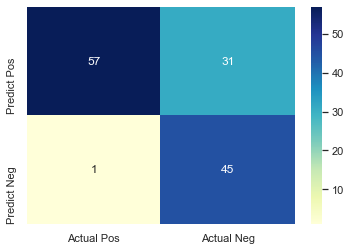

In [90]:
cm = confusion_matrix(y_test_scraped, y_pred_scraped)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [70]:
df_X_test_scraped = pd.DataFrame(X_test_scraped)
df_y_test_scraped = pd.DataFrame(y_test_scraped)
df_y_pred_scraped = pd.DataFrame(y_pred_scraped)

In [122]:
df_X_test_scraped['label'] = df_y_test_scraped
df_X_test_scraped['predictions']= df_y_pred_scraped

In [125]:
df_X_test_scraped

,txt,label,predictions
0,Mexican rulers' lower house majority to shrink...,1,1
1,China administered total of 777.88 mln doses o...,1,1
2,Thailand starts long awaited COVID-19 vaccinat...,1,1
3,Afghan schoolgirl determined to return to scho...,1,1
4,Swiss to vote on whether to become first Europ...,1,1
...,...,...,...
84,The Origins of Keynesian Economics: How Did It...,0,0
85,UK Tells Big Tech to Censor Videos ‘Glamorizin...,0,0
86,Why Corporate Lobbyists and Special Interest G...,0,0
87,AMC stock soars over 20% as Reddit-fueled rall...,0,0


In [127]:
df_X_test_scraped.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Fake_News\data\pred1.csv', index = False)

In [114]:
##2 try
X_test_scraped_tfidf = tfidf_vectorizer4.transform(X_test_scraped)

y_pred_scraped2 = clf.predict(X_test_scraped_tfidf)

display(confusion_matrix(y_test_scraped, y_pred_scraped2))
print('Accuracy is', accuracy_score(y_test_scraped, y_pred_scraped2).round(4))
print('Precision is', precision_score(y_test_scraped, y_pred_scraped2).round(4))
print('Recall is', recall_score(y_test_scraped, y_pred_scraped2).round(4))
print('F1 is', f1_score(y_test_scraped, y_pred_scraped2).round(4))

array([[57, 31],
       [ 4, 78]], dtype=int64)

Accuracy is 0.7941
Precision is 0.7156
Recall is 0.9512
F1 is 0.8168


In [115]:
#df_X_test_scraped = pd.DataFrame(X_test_scraped)
#df_y_test_scraped = pd.DataFrame(y_test_scraped)
df_y_pred_scraped2 = pd.DataFrame(y_pred_scraped2)

In [126]:
df_X_test_scraped2 = df_X_test_scraped.copy()
df_X_test_scraped2['label'] = df_y_test_scraped
df_X_test_scraped2['predictions']= df_y_pred_scraped2
df_X_test_scraped2.head()

,txt,label,predictions
0,Mexican rulers' lower house majority to shrink...,1,1
1,China administered total of 777.88 mln doses o...,1,1
2,Thailand starts long awaited COVID-19 vaccinat...,1,1
3,Afghan schoolgirl determined to return to scho...,1,1
4,Swiss to vote on whether to become first Europ...,1,1


In [128]:
df_X_test_scraped2.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Fake_News\data\pred2.csv', index = False)